#**Python Project - Sales data of super market**

This dataset consists of sales data of a supermarket from 3 different branches A,B,C  over 3 months from January 2019 to March 2019. The summary of the variables and the variable descriptionare given below

**Dataset description:**

Instances: 1000

Features: 17 columns

Numerical: 8 columns

Categorical: 7 columns

Date-Time: 2 columns

**Attribute Information:**

* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorisation groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by the customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10 am to 9 pm)
* Payment: Payment used by the customer for the purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



In [102]:
import numpy as np # importing numpy and as np
import pandas as pd # importing panda as pa
import matplotlib.pyplot as plt # importing matplotlib.pyplot as plt
import seaborn as sns #importing seaborn as sns
from datetime import datetime # importing date time

In [103]:
sm = pd.read_excel("Python_mandatory_project_supermarket_sales (1).xlsx") # Reading the given excel file and saving to variable a

In [104]:
sm.head() # showing 5 Rows of dataframe

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [106]:
sm.columns # showing all columns of dataframe

Index(['Invoice ID', 'Branch', 'city code ', 'Customer type', 'Gender',
       'Product code', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
sm.info() # checking the types of data using info function

In [109]:
for col in ['Branch','city code ',"Customer type","Gender","Product code","Payment", ]: # converting object type to catagorical type data
    sm[col] = sm[col].astype('category')

In [110]:
sm['Time'] = pd.to_datetime(sm['Time'],format ='%H:%M:%S') # converting time to date and time type

In [ ]:
sm.info()

##Q1.Is your supermarket more popular with males or females?

In [132]:
sm['Gender'].value_counts() # counting gender using count function

Female    501
Male      499
Name: Gender, dtype: int64

Above result shows given supermarket has **501 female and 499 male**. so the super market is equally populated. but count of female customer is slightly more than male count

##Q2.What does the customer rating look like and can you also comment on its distribution?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


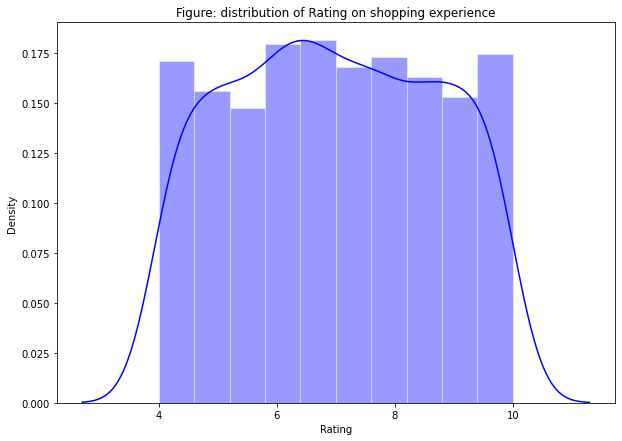

In [112]:
plt.figure(figsize =(10,7)) # adjusting output graph ratio according to our requirement using figure function
sns.distplot(sm['Rating'],color="blue",hist_kws={"edgecolor": 'white'}) # here histogram and dinsity plot is used to check distrubtion of customer rating
plt.title("Figure: distribution of Rating on shopping experience" )
plt.show()

**From above graph it shows, Customer rating distributed Uniformly between 4 to 10.**

##Q3.What can you say about the aggregate sales across the branches?

In [113]:
sm.Branch.value_counts() # Counting sales in each branch using count function

A    340
B    332
C    328
Name: Branch, dtype: int64

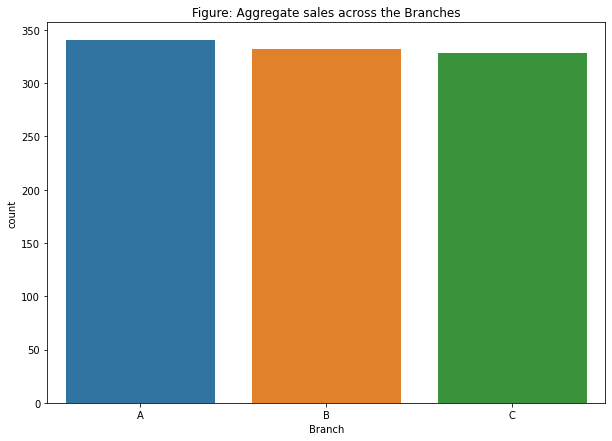

In [115]:
plt.figure(figsize =(10,7))# adjusting output graph ratio according to our requirement using figure function
sns.countplot(x="Branch",data=sm) # Count plot is used to count sales in each branch
plt.title("Figure: Aggregate sales across the Branches" ) # Giving title to the Graph
plt.show()

**Total sales in Branch A is 340, Branch B is 332, and Branch C is 328. So from above graph it's clear that there no much difference in sales. But Branch A has comparatively more sale than other two branch**

##Q4.Which is the most popular payment method used by customers?

In [ ]:
sm.Payment.value_counts() # Counting each payment method using count function

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

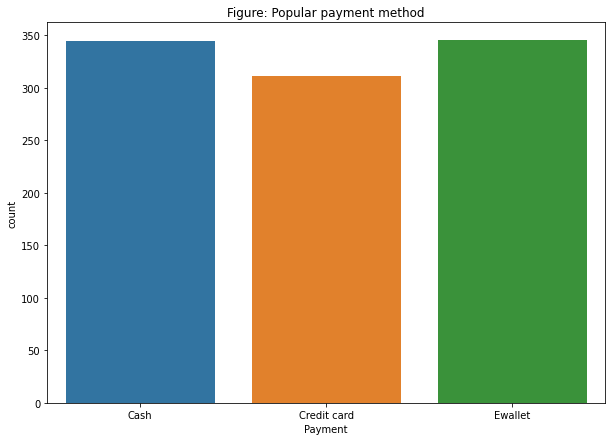

In [116]:
plt.figure(figsize =(10,7))# adjusting output graph ratio according to our requirement using figure function
sns.countplot(x="Payment",data=sm)#counting payment method using count plot
plt.title("Figure: Popular payment method" )
plt.show()

**Ewallet payment method used by 345 customer. Cash payment method used by 344 customer. Credit card payment method used by 311 customer. From above graph its shows that most popular method of payment is cash and Ewallet**

## Q5.Does gross income affect customer ratings?

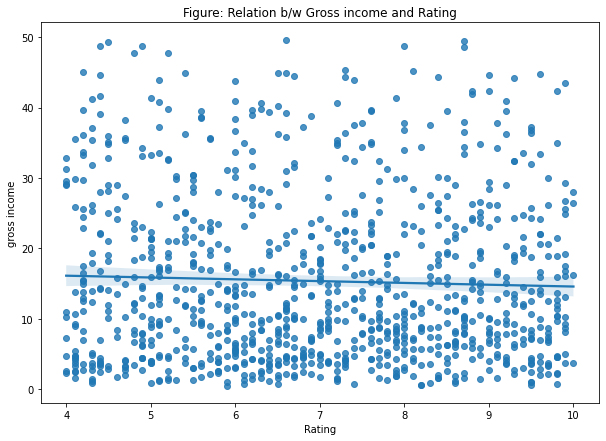

In [133]:
plt.figure(figsize =(10,7)) # adjusting output graph ratio according to our requirement using figure function
sns.regplot(x= 'Rating', y= 'gross income', data = sm)# hear scatter plot used to find the realtion between rating and gross income
plt.title("Figure: Relation b/w Gross income and Rating" )
plt.show()

From above graph it's clear that the regression line is almost flat. that means **changes in rating does not effect gross income of the super market**

##Q.6 Which is the most profitable branch?

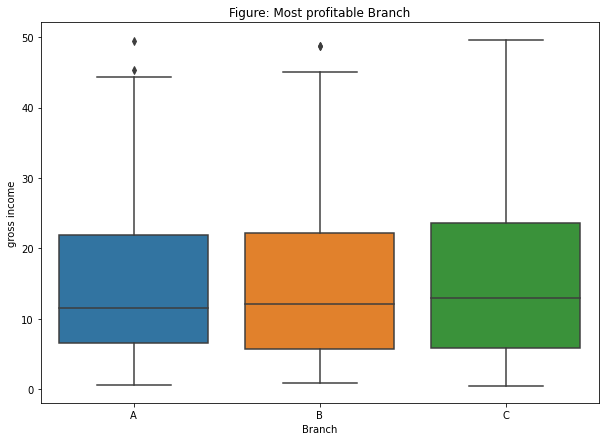

In [134]:
plt.figure(figsize =(10,7)) # adjusting output graph ratio according to our requirement using figure function
sns.boxplot(x= 'Branch', y= 'gross income',data = sm,)# Box plot is used to answer this question
plt.title("Figure: Most profitable Branch" )
plt.show()

From above graph it's clear that **there is no much difference in branch income** but **Branch C** has slighty higher income

##Q.7 Create a boxplot between Gender and Gross income and explain the results?

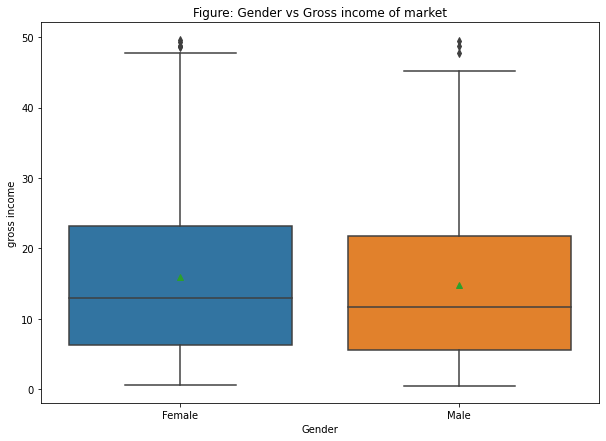

In [119]:
plt.figure(figsize =(10,7))# adjusting output graph ratio according to our requirement using figure function
sns.boxplot(x= 'Gender', y= 'gross income',showmeans = True , data = sm)# syntax for box and whisker plot
plt.title("Figure: Gender vs Gross income of market" )
plt.show()

Graph shows that **Female customer spend slightly more money than male customer.** in other words **super market gets slightly more income from Female customer than male customer**

##Q.8 Can you see any time trend in gross income?

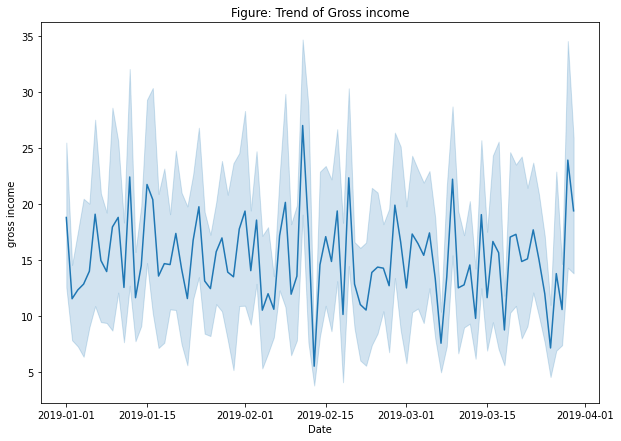

In [121]:
plt.figure(figsize =(10,7)) # adjusting output graph ratio according to our requirement using figure function
sns.lineplot( x = "Date",y = 'gross income', data = sm); # lineplot is used to find the trend
plt.title("Figure: Trend of Gross income" )
plt.show()

From above graph we observed that**No time trend found for gross income**

##Q.9 What is the spending pattern of both males and females, meaning in which category do they spend more?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


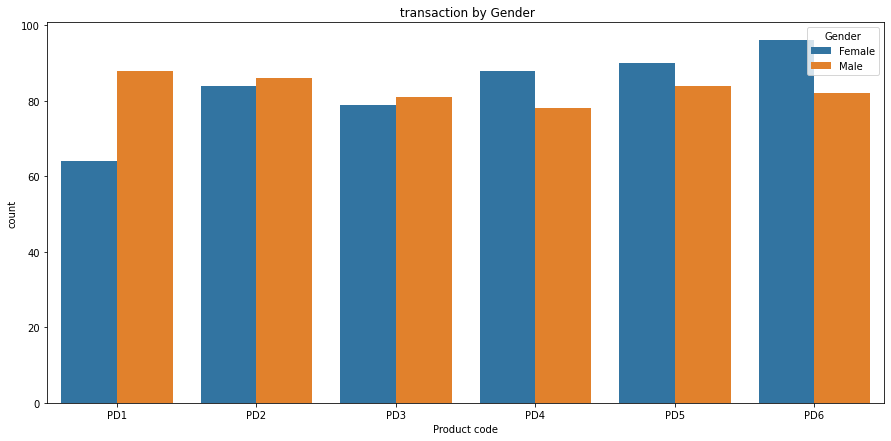

In [122]:
plt.figure(figsize=(15, 7))# adjusting output graph ratio according to our requirement using figure function
plt.title(' transaction by Gender') # Title for Graph
sns.countplot(sm['Product code'], hue = sm.Gender) # counting product code with veriable gender
plt.show()

From the above graph it's clear that **Male spend more on
PD1, that is Electronic accessories,** and **Female spend more on PD4,PD5,PD6 that is Health and beauty, Home and lifestyle, Sports and travel** also **both spend slightly equal on PD2, PD3 that is  Fashion accessories, Food and beverages**

##Q.10.How many products are bought by customers?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


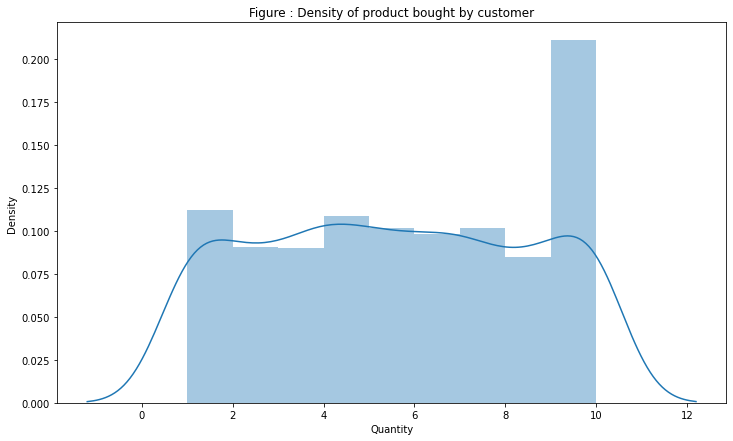

In [123]:
plt.figure(figsize = (12,7))# adjusting output graph ratio according to our requirement using figure function
plt.title('Figure : Density of product bought by customer')
sns.distplot(sm['Quantity'])#density plot for quantity is used to answer the question
plt.show()

**Above Graph shows that most of the customers are purchasing 10 number of items from the Super market**

##Q.11.Which day of the week has maximum sales? 

In [124]:
sm['week'] = sm['Date'].dt.day_name() # extracting week day data from date column and saving to new column week


In [ ]:
sm.head()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


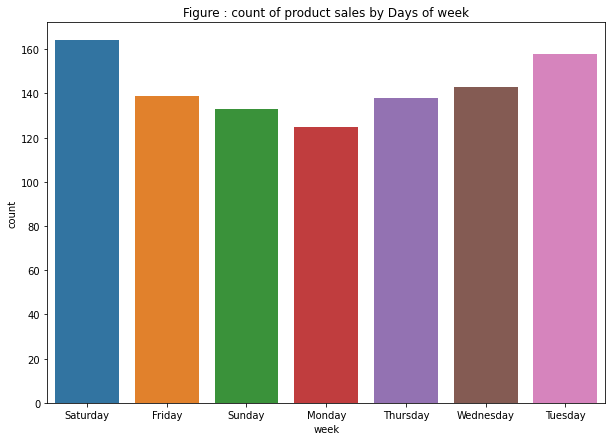

In [127]:
plt.figure(figsize=(10, 7))# adjusting output graph ratio according to our requirement using figure function
plt.title('Figure : count of product sales by Days of week')
sns.countplot(sm['week']) #counting the week day sales

**Above Graph shows that, on Saturday is sales is more because of weekend.Also Tuesday's sales  is comparatively  is next to saturday's sales. Mondays is lowest sales in the week**

##Q.12.Which hour of the day is busiest?

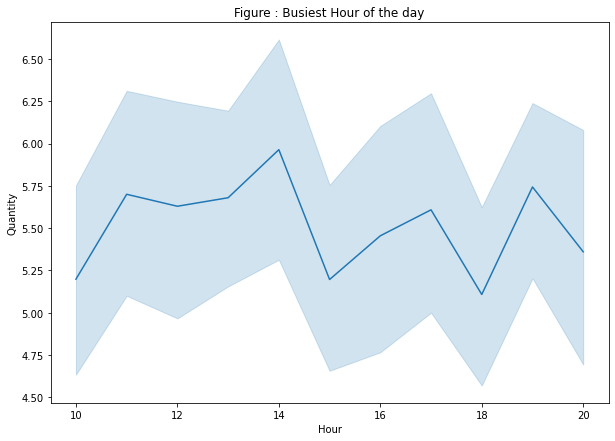

In [128]:
sm['Hour'] = (sm['Time']).dt.hour # creating new column Hour from time column
plt.figure(figsize=(10, 7))# adjusting output graph ratio according to our requirement using figure function
plt.title('Figure : Busiest Hour of the day')
sns.lineplot(data = sm, x = 'Hour', y = 'Quantity')# using line plot for answering question

plt.show()

Above Graph shows that **14 hour that is 2PM is the busiest hour of the day**

##Q.13 Which product line should your supermarket focus on?

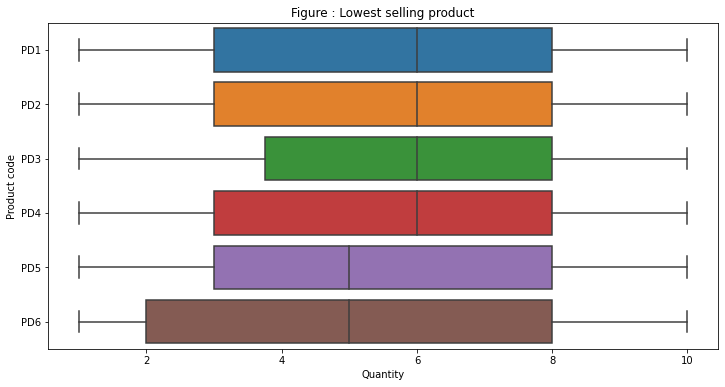

In [130]:
plt.figure(figsize = (12,6)) # adjusting output graph ratio according to our requirement using figure function
plt.title('Figure : Lowest selling product')
sns.boxplot(x = sm['Quantity'], y = sm["Product code"])#using box plot to answer this question
plt.show()

Above Graph shows that **PD5 & PD6 that is (Home and lifestyle), (Sports and travel) are lowest selling product. so more focus required on this products**

##Q.14 Which city should be chosen for expansion and what products should be focussed on?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


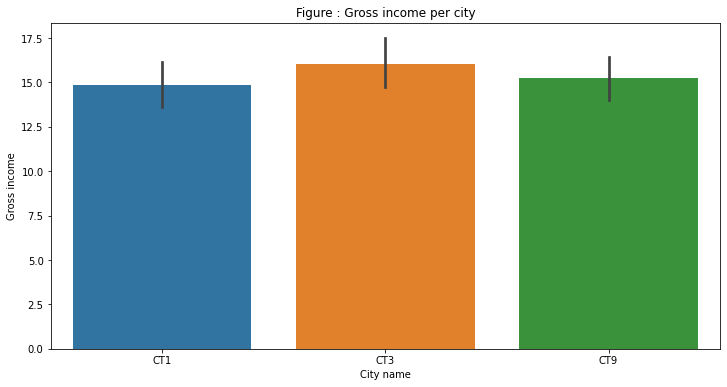

In [131]:
plt.figure(figsize=(12,6)) # adjusting output graph ratio according to our requirement using figure function
plt.title('Figure : Gross income per city')
sns.barplot(sm['city code '],sm['gross income'])# counting gross income of each brach using barplot
plt.xlabel('City name')# giving lable to x axis
plt.ylabel('Gross income')# giving lable to y axis
plt.show()


From above graph **CT3 has more gross income then other cities. so CT3 can be choosen for expansion**

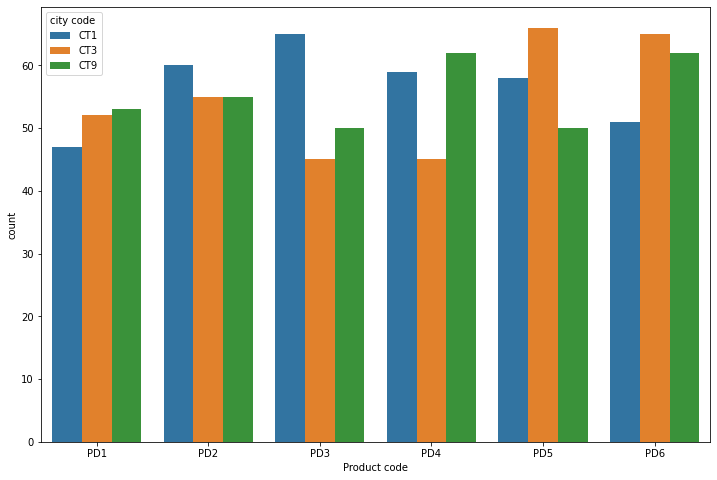

In [100]:
plt.figure(figsize=(12,8)) # adjusting output graph ratio according to our requirement using figure function
sns.countplot(x='Product code', hue='city code ', data=sm)# counting each product sale with respect to city
plt.show()

**In CT3 Product PD5 & PD6 that is (Home and lifestyle), (Sports and travel) are most sold products. These products to be focused more during expansion**